In [3]:
!pip install pandas scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import ast
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read evalutaion input from Google Vision Model 
file= 'Google+Openai_SP_Evaluation_Input.csv'
df= pd.read_csv(file)

In [6]:
df['ground_truth_single'] = df['ground_truth_single'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      271 non-null    int64  
 1   image_id                        271 non-null    object 
 2   ground_truth                    270 non-null    object 
 3   google_vision_sp_detection      271 non-null    object 
 4   google_vision_sp_score          271 non-null    float64
 5   google_vision_sp_response Time  271 non-null    object 
 6   vision_openai_sp_detection      271 non-null    object 
 7   vision_openai_response_time     271 non-null    float64
 8   ground_truth_single             271 non-null    object 
 9   ground_truth_multiple           270 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 21.3+ KB


In [8]:
df['vision_openai_sp_detection'] = df['vision_openai_sp_detection'].replace('30 St Mary Axe (the Gherkin)', '30 St Mary Axe (The Gherkin)')
df['vision_openai_sp_detection'] = df['vision_openai_sp_detection'].fillna(value='None')
df['google_vision_sp_detection'] = df['google_vision_sp_detection'].fillna(value='None')

In [9]:
report = classification_report(df['ground_truth_single'], df['google_vision_sp_detection'], output_dict=True)
print(report)

{'30 St Mary Axe (The Gherkin)': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6}, 'Big Ben': {'precision': 0.3125, 'recall': 0.2777777777777778, 'f1-score': 0.29411764705882354, 'support': 18}, 'Lastminute.com London Eye': {'precision': 0.5, 'recall': 0.14285714285714285, 'f1-score': 0.22222222222222224, 'support': 21}, 'None': {'precision': 0.5845410628019324, 'recall': 0.968, 'f1-score': 0.7289156626506026, 'support': 125}, 'Palace Of Westminster': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9}, 'The British Museum': {'precision': 0.9375, 'recall': 0.5555555555555556, 'f1-score': 0.6976744186046512, 'support': 27}, 'The Shard': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'Tower Bridge': {'precision': 0.35294117647058826, 'recall': 0.1935483870967742, 'f1-score': 0.25, 'support': 31}, 'Tower Of London': {'precision': 0.5, 'recall': 0.2857142857142857, 'f1-score': 0.36363636363636365, 'support': 7}, 'Trafalgar Square': {'precisi

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


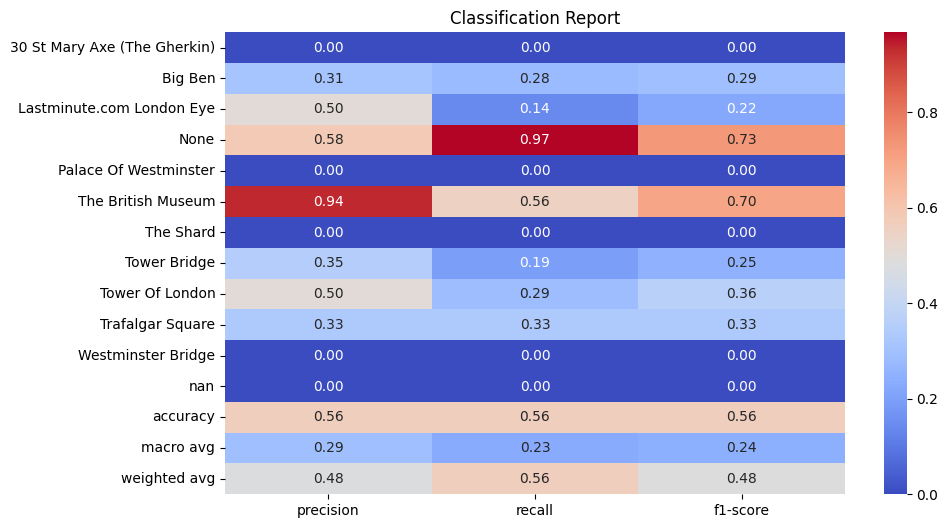

In [10]:
df_model1 = pd.DataFrame(report).transpose()

# Drop the 'support' column if you don't want to visualize it
df_model1 = df_model1.drop(columns=['support'])

# Visualization with Seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_model1 , annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report")
plt.show()

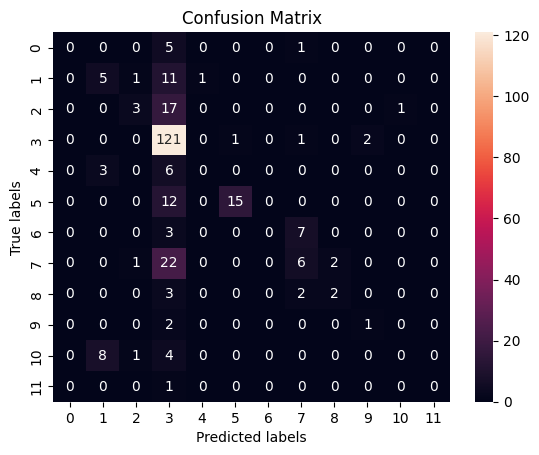

In [11]:
# confusion matrix 
conf_matrix = confusion_matrix(df['ground_truth_single'], df['google_vision_sp_detection'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


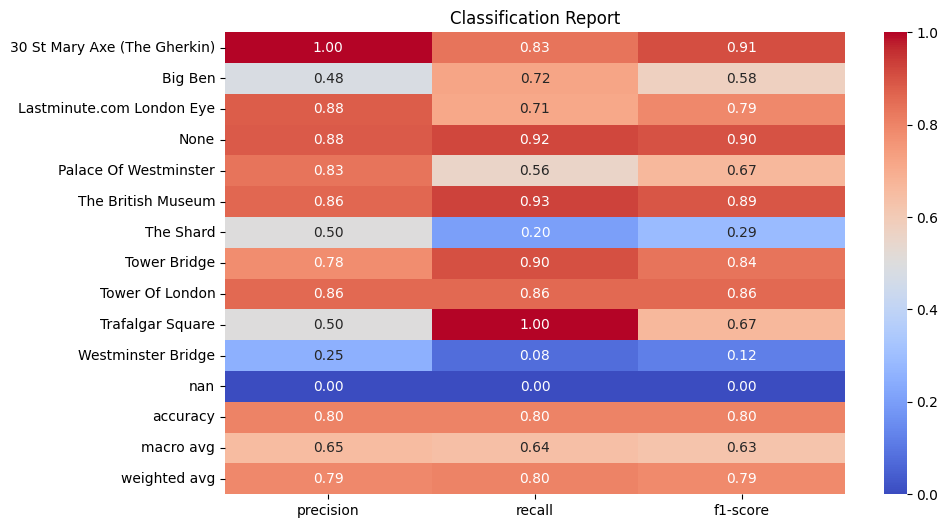

{'30 St Mary Axe (The Gherkin)': {'precision': 1.0, 'recall': 0.8333333333333334, 'f1-score': 0.9090909090909091, 'support': 6}, 'Big Ben': {'precision': 0.48148148148148145, 'recall': 0.7222222222222222, 'f1-score': 0.5777777777777777, 'support': 18}, 'Lastminute.com London Eye': {'precision': 0.8823529411764706, 'recall': 0.7142857142857143, 'f1-score': 0.7894736842105262, 'support': 21}, 'None': {'precision': 0.8846153846153846, 'recall': 0.92, 'f1-score': 0.9019607843137256, 'support': 125}, 'Palace Of Westminster': {'precision': 0.8333333333333334, 'recall': 0.5555555555555556, 'f1-score': 0.6666666666666667, 'support': 9}, 'The British Museum': {'precision': 0.8620689655172413, 'recall': 0.9259259259259259, 'f1-score': 0.8928571428571429, 'support': 27}, 'The Shard': {'precision': 0.5, 'recall': 0.2, 'f1-score': 0.28571428571428575, 'support': 10}, 'Tower Bridge': {'precision': 0.7777777777777778, 'recall': 0.9032258064516129, 'f1-score': 0.835820895522388, 'support': 31}, 'Tower

In [12]:
report_2 = classification_report(df['ground_truth_single'], df['vision_openai_sp_detection'], output_dict=True)
df_model2 = pd.DataFrame(report_2).transpose()

# Drop the 'support' column if you don't want to visualize it
df_model2 = df_model2.drop(columns=['support'])

# Visualization with Seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_model2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report")
plt.show()

print(report_2)

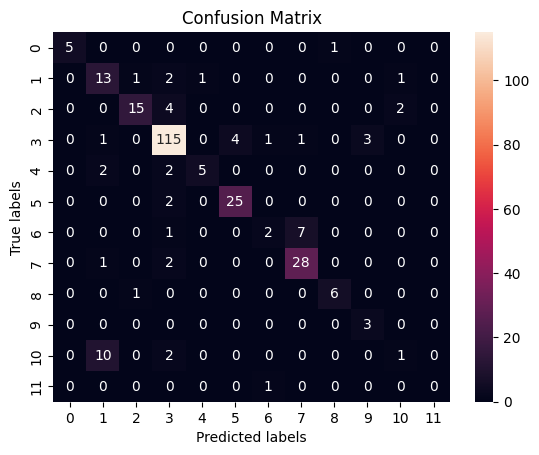

In [13]:
# confusion matrix 
conf_matrix_2 = confusion_matrix(df['ground_truth_single'], df['vision_openai_sp_detection'])
sns.heatmap(conf_matrix_2, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
df_model2_f1_score = df_model2.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model1_f1_score = df_model1.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model2_recall = df_model2.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model1_recall = df_model1.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model2_precision = df_model2.drop(index=['accuracy', 'macro avg', 'weighted avg'])
df_model1_precision = df_model1.drop(index=['accuracy', 'macro avg', 'weighted avg'])


In [15]:
def plot_metric_comparison(df1, df2, metric, label1='Model 1', label2='Model 2', color1='blue', color2='red'):
    """
    Plots a comparison of a specified metric between two models, excluding zero values.

    Parameters:
    - df1: DataFrame for the first model.
    - df2: DataFrame for the second model.
    - metric: The metric to plot (e.g., 'precision').
    - label1: Label for the first model (optional).
    - label2: Label for the second model (optional).
    - color1: Line color for the first model (optional).
    - color2: Line color for the second model (optional).
    """
    plt.figure(figsize=(15, 6))
    
    # Filter out zero values from the dataframes
    filtered_df1 = df1[df1[metric] != 0]
    filtered_df2 = df2[df2[metric] != 0]

    # Plot metric for both models
    plt.plot(filtered_df1.index, filtered_df1[metric], marker='o', linestyle='-', color=color1, label=f'{label1} {metric.title()}')
    plt.plot(filtered_df2.index, filtered_df2[metric], marker='s', linestyle='-', color=color2, label=f'{label2} {metric.title()}')
    
    # Annotate points with metric values
    for i, txt in enumerate(filtered_df1[metric]):
        plt.annotate(f"{txt:.2f}", (filtered_df1.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(filtered_df2[metric]):
        plt.annotate(f"{txt:.2f}", (filtered_df2.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(f'{metric.title()} Comparison between Two Models')
    plt.xlabel('Class')
    plt.ylabel(f'{metric.title()} Score')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Adjust label alignment
    plt.grid(True)
    plt.tight_layout()
    plt.show()

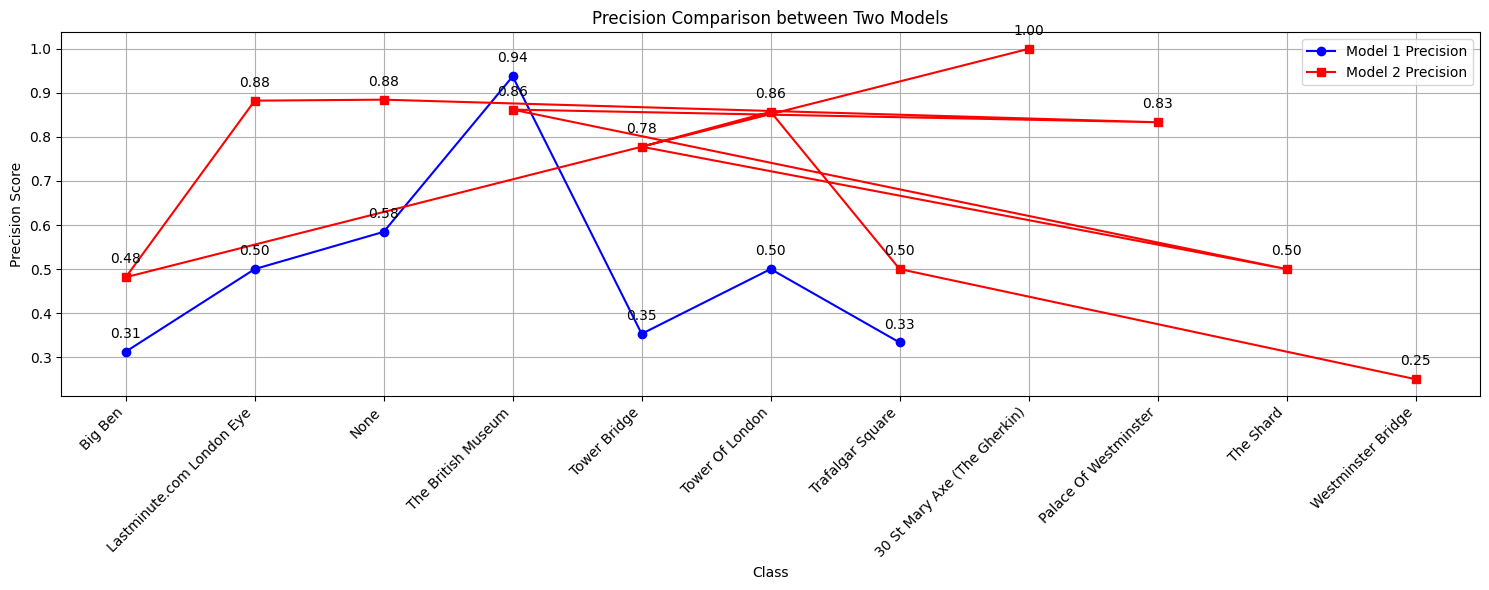

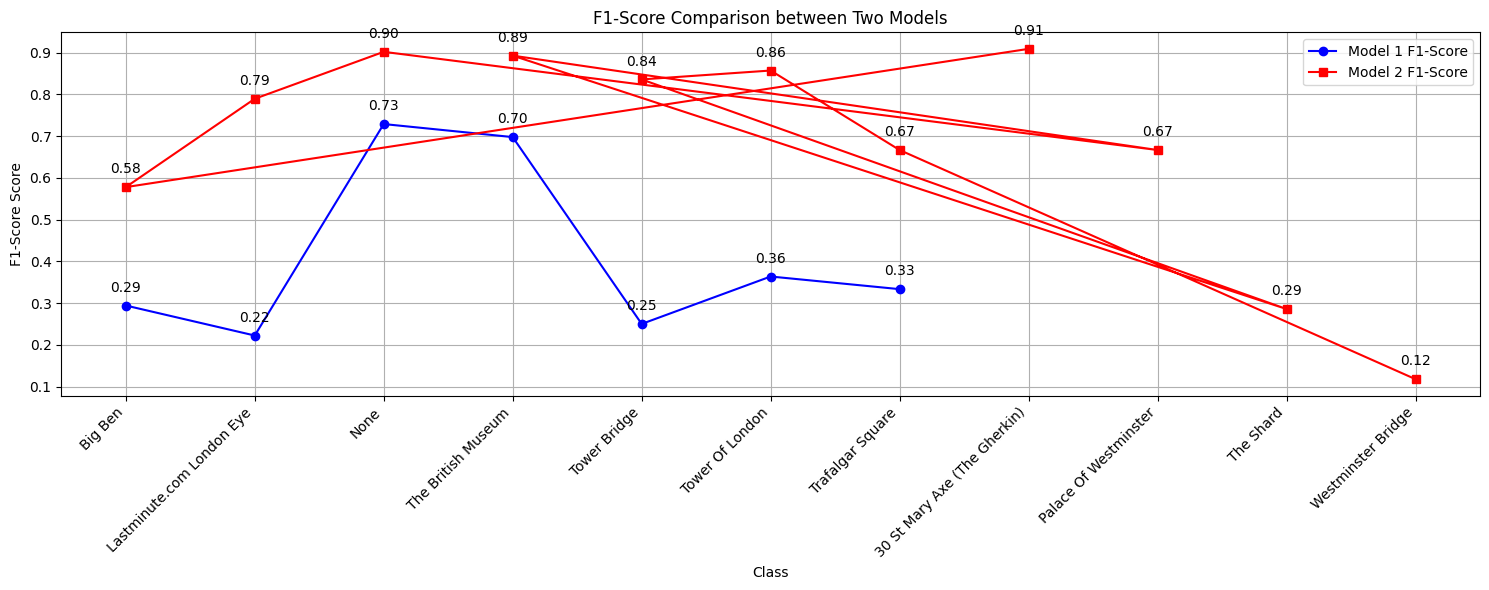

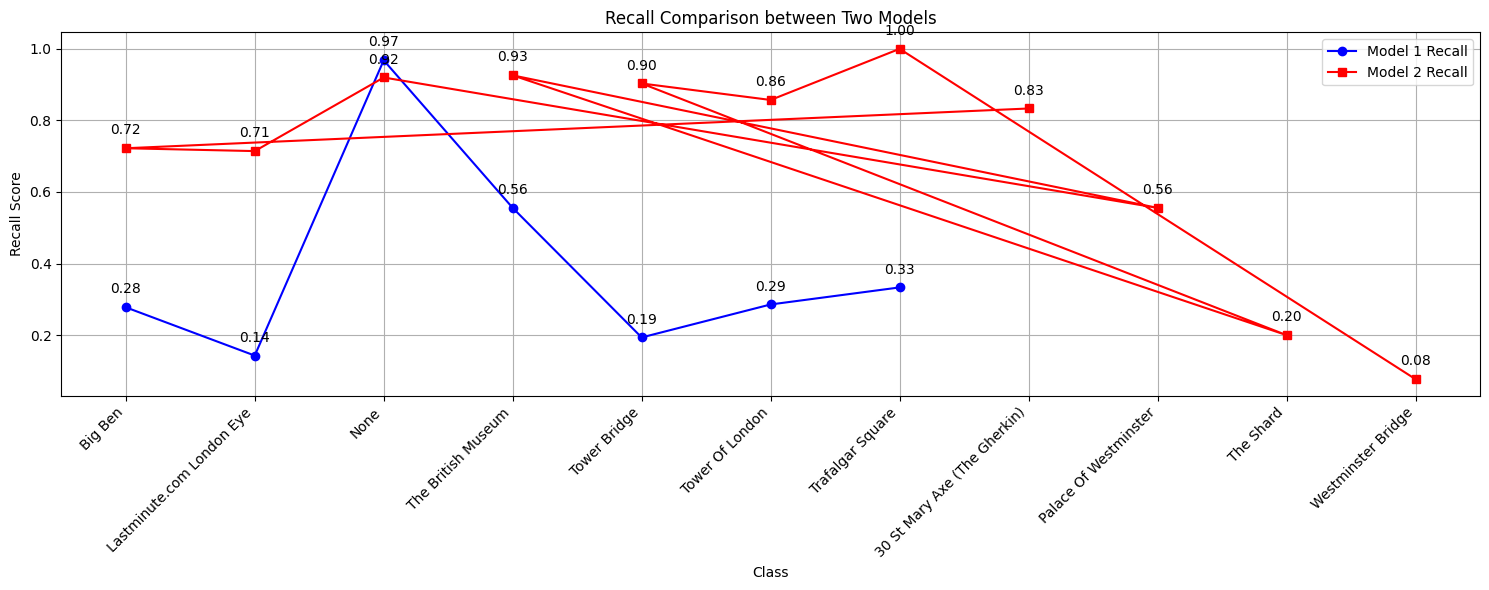

In [16]:
plot_metric_comparison(df_model1_precision, df_model2_precision, 'precision')
plot_metric_comparison(df_model1_f1_score, df_model2_f1_score, 'f1-score')
plot_metric_comparison(df_model1_recall, df_model2_recall, 'recall')

In [17]:
def plot_metric_comparison_scatter(df1, df2, metric, label1='Model 1', label2='Model 2'):
    """
    Plots a scatter comparison of a specified metric between two models, excluding zero values, 
    with annotations for metric values.
    """
    # Filter out zero values
    filtered_df1 = df1[df1[metric] != 0]
    filtered_df2 = df2[df2[metric] != 0]

    # Set up the plot
    plt.figure(figsize=(15, 6))
    
    # Create scatter plots
    plt.scatter(filtered_df1.index, filtered_df1[metric], color='blue', label=label1, s=100)  # s is the marker size
    plt.scatter(filtered_df2.index, filtered_df2[metric], color='red', label=label2, s=100)

    # Annotate each point in df1
    for i, txt in enumerate(filtered_df1[metric]):
        plt.annotate(f"{txt:.2f}",  # This formats the text to 2 decimal places
                     (filtered_df1.index[i], filtered_df1[metric].iloc[i]), 
                     textcoords="offset points", 
                     xytext=(0,10),  # These are coordinates for text alignment
                     ha='center', 
                     fontsize=9)

    # Annotate each point in df2
    for i, txt in enumerate(filtered_df2[metric]):
        plt.annotate(f"{txt:.2f}",  # This formats the text to 2 decimal places
                     (filtered_df2.index[i], filtered_df2[metric].iloc[i]),
                     textcoords="offset points", 
                     xytext=(0,10),  # These are coordinates for text alignment
                     ha='center', 
                     fontsize=9)

    # Add labels and title
    plt.title(f'Scatter Plot Comparison of {metric.title()} between Two Models', fontsize=14)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel(metric.title(), fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Adjust label alignment
    plt.tight_layout()
    plt.show()


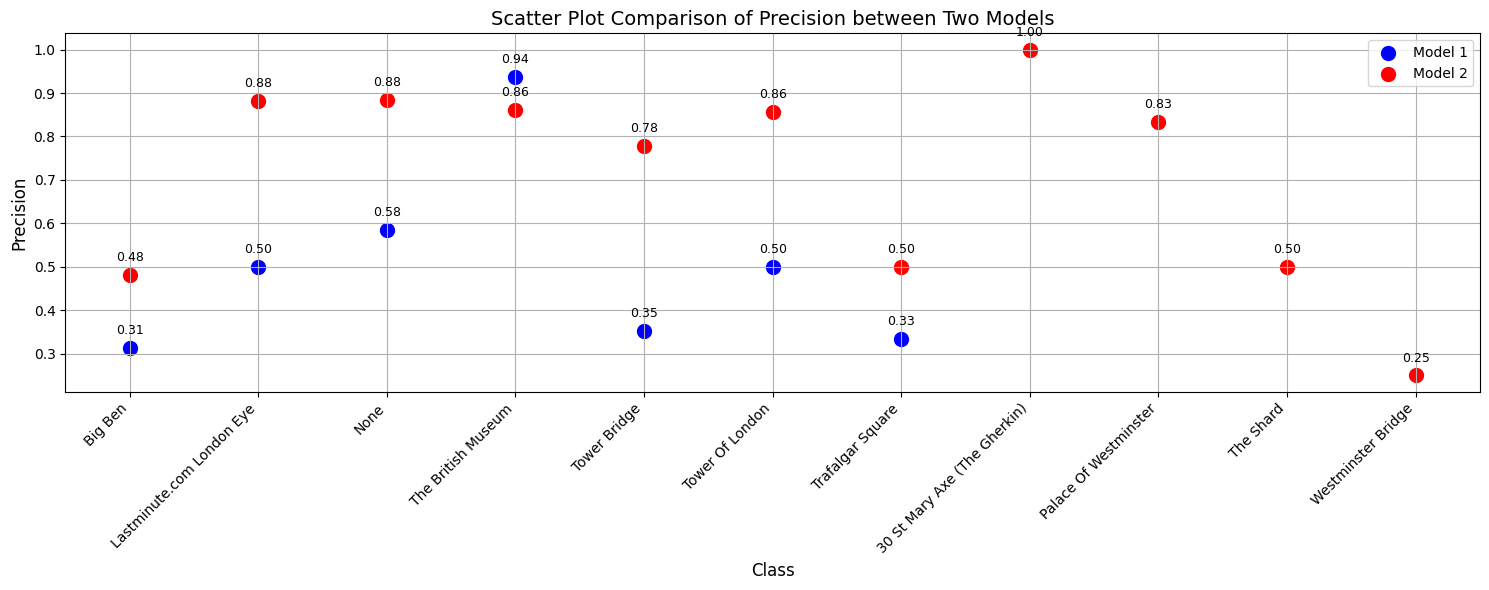

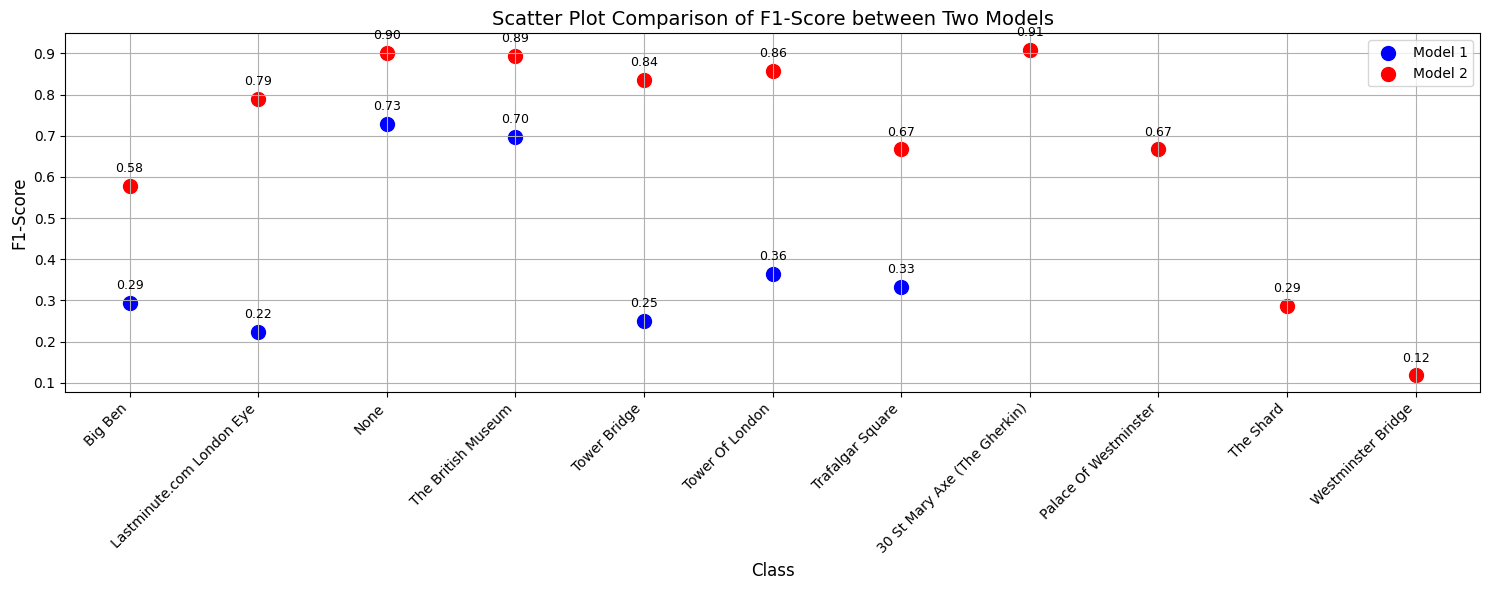

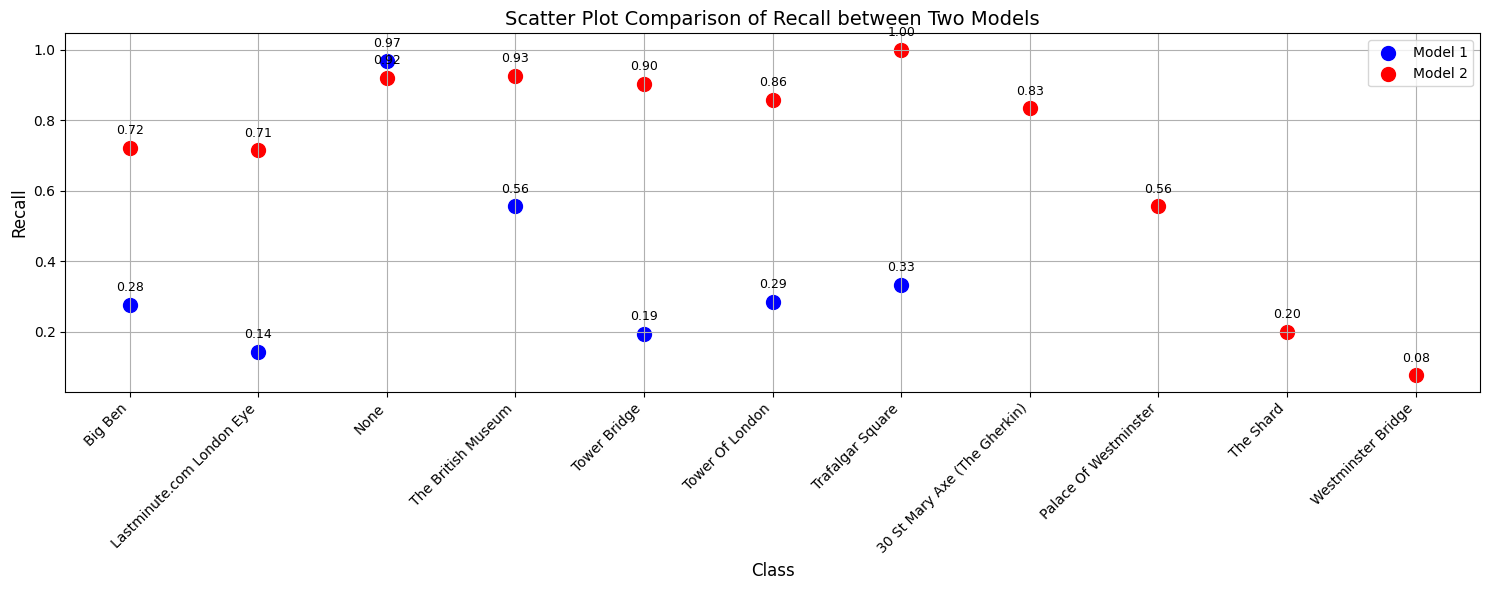

In [18]:
plot_metric_comparison_scatter(df_model1_precision, df_model2_precision, 'precision')
plot_metric_comparison_scatter(df_model1_f1_score, df_model2_f1_score, 'f1-score')
plot_metric_comparison_scatter(df_model1_recall, df_model2_recall, 'recall')

In [19]:
def calculate_metrics_by_class(df, ground_truth_col, detections_col):
    # Extract unique classes from all concatenated ground truths
    all_classes = set(','.join(df[ground_truth_col].dropna()).split(','))
    
    # Initialize dictionaries for metrics
    precision_dict, recall_dict, f1_dict, accuracy_dict = {}, {}, {}, {}

    # Calculate metrics for each class
    for cls in all_classes:
        # True Positives (TP): Class is in both ground truth and any detection
        TP = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and any(cls in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # False Positives (FP): Class is not in ground truth but is in any detection
        FP = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and any(cls in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # False Negatives (FN): Class is in ground truth but not in any detection
        FN = df.apply(lambda x: cls in str(x[ground_truth_col]).split(',') and all(cls not in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()
        # True Negatives (TN): Class is not in ground truth and not in any detection
        TN = df.apply(lambda x: cls not in str(x[ground_truth_col]).split(',') and all(cls not in detection for detection in str(x[detections_col]).split(',')), axis=1).sum()

        # Calculate Precision, Recall, F1 Score, and Accuracy
        precision = round(TP / (TP + FP) if TP + FP > 0 else 0, 2)
        recall = round(TP / (TP + FN) if TP + FN > 0 else 0, 2)
        f1 = round(2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0, 2)
        accuracy = round((TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0, 2)

        # Store metrics
        precision_dict[cls] = precision
        recall_dict[cls] = recall
        f1_dict[cls] = f1
        accuracy_dict[cls] = accuracy
    
    # Return these as a DataFrame
    metrics_df = pd.DataFrame({
        'Precision': precision_dict, 
        'Recall': recall_dict, 
        'F1': f1_dict,
        'Accuracy': accuracy_dict
    }).sort_index()  # Sorted by class names
    
    return metrics_df


# Example usage for two different models or detection columns
metrics_df_model_1 = calculate_metrics_by_class(df, 'ground_truth_multiple', 'google_vision_sp_detection')
metrics_df_model_2 = calculate_metrics_by_class(df, 'ground_truth_multiple', 'vision_openai_sp_detection')


# Printing the metrics DataFrame for each model
print("Metrics for Model 1:")
print(metrics_df_model_1)
print("\nMetrics for Model 2:")
print(metrics_df_model_2)


Metrics for Model 1:
                              Precision  Recall    F1  Accuracy
30 St Mary Axe (The Gherkin)       0.00    0.00  0.00      0.97
Big Ben                            0.88    0.34  0.49      0.89
Lastminute.com London Eye          0.50    0.14  0.22      0.92
None                               0.59    0.97  0.73      0.67
Palace Of Westminster              0.00    0.00  0.00      0.89
The British Museum                 0.94    0.56  0.70      0.95
The Shard                          0.00    0.00  0.00      0.94
Tower Bridge                       0.71    0.32  0.44      0.89
Tower Of London                    0.50    0.22  0.31      0.97
Trafalgar Square                   0.33    0.33  0.33      0.99
Westminster Bridge                 0.00    0.00  0.00      0.92

Metrics for Model 2:
                              Precision  Recall    F1  Accuracy
30 St Mary Axe (The Gherkin)       1.00    0.62  0.77      0.99
Big Ben                            0.96    0.63  0.76      0.

In [20]:
# comparison between model1 and model 1 after robustness test
# Read evalutaion input from Google Vision Model 
file= 'Google+Openai_Evaluation_Input.csv'
df= pd.read_csv(file)
df_cleaned = df.dropna()

In [21]:
report = classification_report(df['ground_truth_single'], df['description'], output_dict=True)
print(report)
df_model1_pre = pd.DataFrame(report).transpose()

{'30 St Mary Axe (The Gherkin)': {'precision': 1.0, 'recall': 0.4444444444444444, 'f1-score': 0.6153846153846153, 'support': 18}, 'Big Ben': {'precision': 0.30303030303030304, 'recall': 0.5172413793103449, 'f1-score': 0.38216560509554137, 'support': 58}, 'Lastminute.com London Eye': {'precision': 0.5789473684210527, 'recall': 0.8208955223880597, 'f1-score': 0.6790123456790124, 'support': 67}, 'None': {'precision': 0.9382022471910112, 'recall': 0.835, 'f1-score': 0.8835978835978836, 'support': 400}, 'Palace Of Westminster': {'precision': 0.7142857142857143, 'recall': 0.11363636363636363, 'f1-score': 0.19607843137254902, 'support': 44}, 'The British Museum': {'precision': 0.6428571428571429, 'recall': 1.0, 'f1-score': 0.782608695652174, 'support': 72}, 'The Shard': {'precision': 0.8, 'recall': 0.08695652173913043, 'f1-score': 0.1568627450980392, 'support': 46}, 'Tower Bridge': {'precision': 0.6171875, 'recall': 0.6810344827586207, 'f1-score': 0.6475409836065574, 'support': 116}, 'Tower O

In [22]:
def plot_metric_comparison(df1, df2, metric, label1='Model 1 (no noise)', label2='Model 1 (with noise)', color1='green', color2='orange'):
    
    # Drop NaN values from the metric columns in both dataframes
    df1_clean = df1.dropna(subset=[metric])
    df2_clean = df2.dropna(subset=[metric])

    plt.figure(figsize=(15, 6))
    
    # Plot metric for both cleaned models
    plt.plot(df1_clean.index, df1_clean[metric], marker='o', linestyle='-', color=color1, label=f'{label1} {metric.title()}')
    plt.plot(df2_clean.index, df2_clean[metric], marker='s', linestyle='-', color=color2, label=f'{label2} {metric.title()}')
    
    # Annotate points with metric values
    for i, txt in enumerate(df1_clean[metric]):
        plt.annotate(f"{txt:.2f}", (df1_clean.index[i], df1_clean[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(df2_clean[metric]):
        plt.annotate(f"{txt:.2f}", (df2_clean.index[i], df2_clean[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(f'{metric.title()} Comparison between Model 1: with and without input noise')
    plt.xlabel('Class')
    plt.ylabel(f'{metric.title()} Score')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Adjust label alignment
    plt.grid(True)
    plt.tight_layout()
    plt.show()


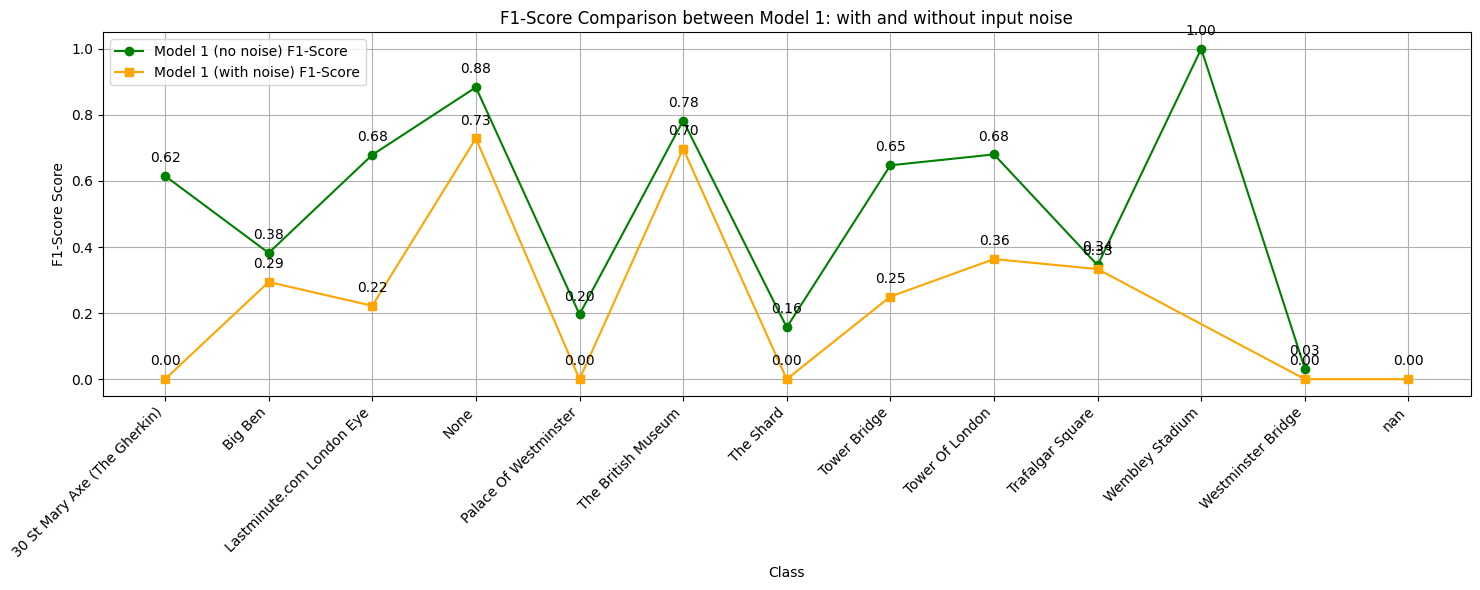

In [23]:
df_model1_pre_f1_score = df_model1_pre.drop(index=['accuracy', 'macro avg', 'weighted avg'])
plot_metric_comparison(df_model1_pre_f1_score, df_model1_f1_score, 'f1-score')

In [24]:
report = classification_report(df['ground_truth_single'], df['detections_vision_openai'], output_dict=True)
print(report)
df_model2_pre = pd.DataFrame(report).transpose()

{'30 St Mary Axe (The Gherkin)': {'precision': 0.7647058823529411, 'recall': 0.7222222222222222, 'f1-score': 0.7428571428571428, 'support': 18}, 'Big Ben': {'precision': 0.5252525252525253, 'recall': 0.896551724137931, 'f1-score': 0.6624203821656051, 'support': 58}, 'Lastminute.com London Eye': {'precision': 0.8985507246376812, 'recall': 0.9253731343283582, 'f1-score': 0.9117647058823529, 'support': 67}, 'None': {'precision': 0.9510309278350515, 'recall': 0.9225, 'f1-score': 0.9365482233502538, 'support': 400}, 'Palace Of Westminster': {'precision': 0.75, 'recall': 0.6136363636363636, 'f1-score': 0.6749999999999999, 'support': 44}, 'The British Museum': {'precision': 0.8783783783783784, 'recall': 0.9027777777777778, 'f1-score': 0.8904109589041096, 'support': 72}, 'The Shard': {'precision': 0.8695652173913043, 'recall': 0.43478260869565216, 'f1-score': 0.5797101449275363, 'support': 46}, 'Tower Bridge': {'precision': 0.7931034482758621, 'recall': 0.9913793103448276, 'f1-score': 0.881226

In [25]:
def plot_metric_comparison(df1, df2, metric, label1='Model 2 (no noise)', label2='Model 2 (with noise)', color1='green', color2='orange'):
    
    # Drop NaN values from the metric columns in both dataframes
    df1_clean = df1.dropna(subset=[metric])
    df2_clean = df2.dropna(subset=[metric])

    plt.figure(figsize=(15, 6))
    
    # Plot metric for both cleaned models
    plt.plot(df1_clean.index, df1_clean[metric], marker='o', linestyle='-', color=color1, label=f'{label1} {metric.title()}')
    plt.plot(df2_clean.index, df2_clean[metric], marker='s', linestyle='-', color=color2, label=f'{label2} {metric.title()}')
    
    # Annotate points with metric values
    for i, txt in enumerate(df1_clean[metric]):
        plt.annotate(f"{txt:.2f}", (df1_clean.index[i], df1_clean[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(df2_clean[metric]):
        plt.annotate(f"{txt:.2f}", (df2_clean.index[i], df2_clean[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(f'{metric.title()} Comparison between Model 2: with and without input noise')
    plt.xlabel('Class')
    plt.ylabel(f'{metric.title()} Score')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Adjust label alignment
    plt.grid(True)
    plt.tight_layout()
    plt.show()


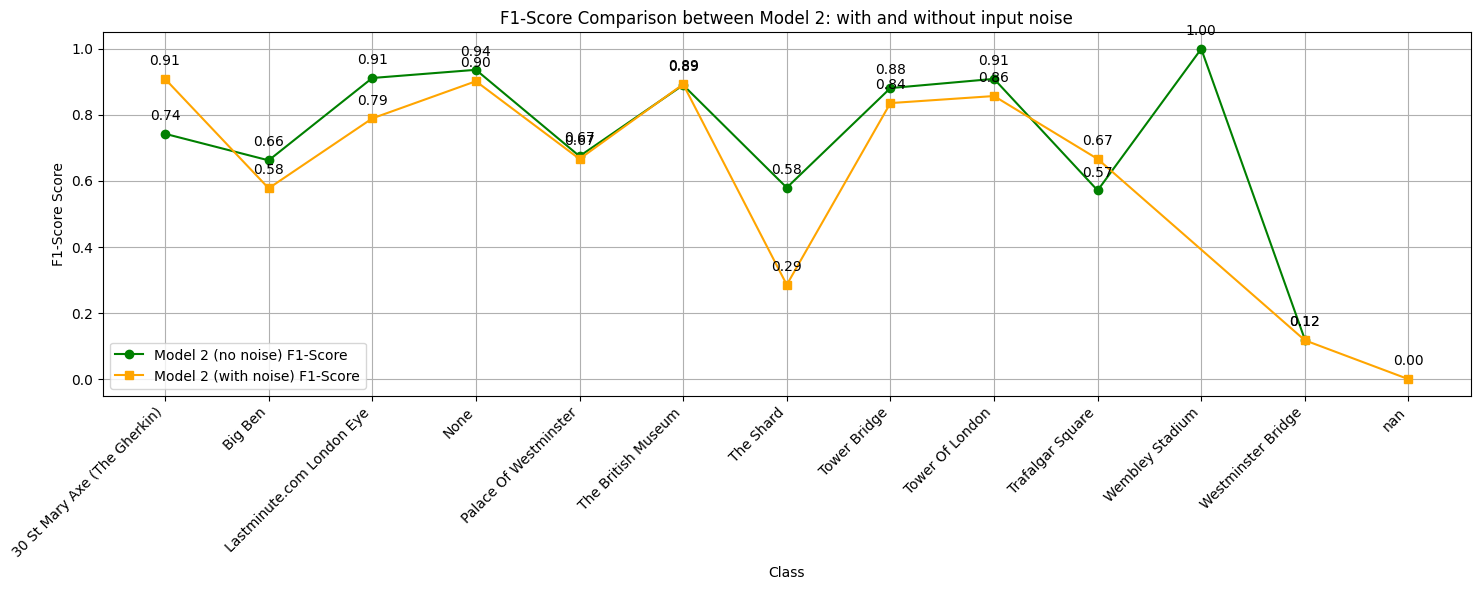

In [26]:
df_model2_pre_f1_score = df_model2_pre.drop(index=['accuracy', 'macro avg', 'weighted avg'])
plot_metric_comparison(df_model2_pre_f1_score, df_model2_f1_score, 'f1-score')